<a href="https://colab.research.google.com/github/HanenEl/Elevvo-Internship/blob/main/Task2%3A%20EDA%20on%20Titanic%20Dataset/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read Data
df = pd.read_csv('/content/train.csv')

In [ ]:
# Show first 5 rows from the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Number of Rows & Coulmns
df.shape

(891, 12)

In [ ]:
# Display Info About Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Display summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Checking Duplicated Data
df.duplicated().sum()

np.int64(0)

Note:
- there is no duplicate data.

In [ ]:
# Check for missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Fill missing values with the median
df["Age"].fillna(df["Age"].median(), inplace=True)

In [ ]:
# Round ages to the nearest integer and convert to int type
df["Age"] = df["Age"].round().astype(int)

# Replace ages less than 1
df.loc[df["Age"] < 1, "Age"] = 1

In [ ]:
# Fill missing values with the Mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
# Drop the "Cabin" column because it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [ ]:
# Extract title from the Name column
df["Title"] = df["Name"].str.extract(r' ([A-Za-z]+)\.')

# Replace uncommon and similar titles with standardized categories
df["Title"] = df["Title"].replace({
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs",
    "Lady": "Rare",
    "Countess": "Rare",
    "Capt": "Rare",
    "Col": "Rare",
    "Don": "Rare",
    "Dr": "Rare",
    "Major": "Rare",
    "Rev": "Rare",
    "Sir": "Rare",
    "Jonkheer": "Rare",
    "Dona": "Rare"
})

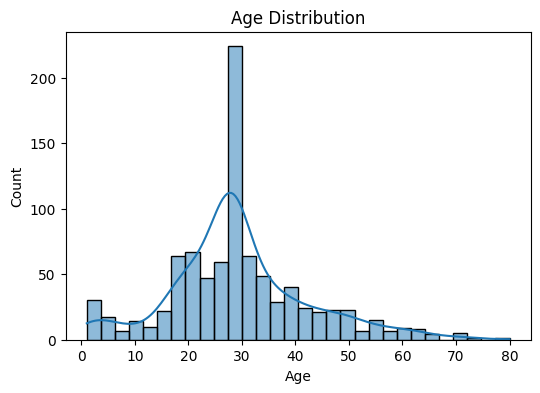

In [ ]:
# Plot the age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


Text(0.5, 1.0, 'Survival by Gender')

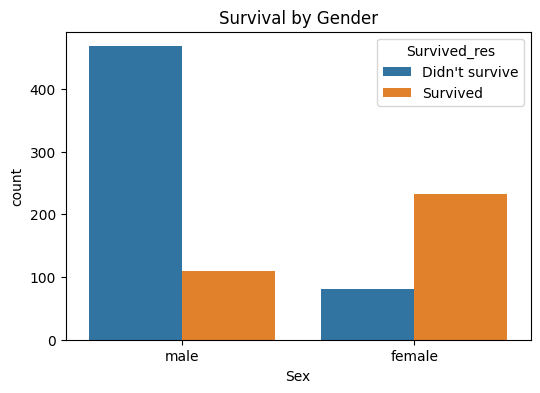

In [ ]:
# Plot Survival by Gender
df["Survived_res"]= df['Survived'].map({0: "Didn't survive", 1: "Survived"})

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived_res', data=df)
plt.title("Survival by Gender")

Text(0.5, 1.0, 'Survival by Passenger Class')

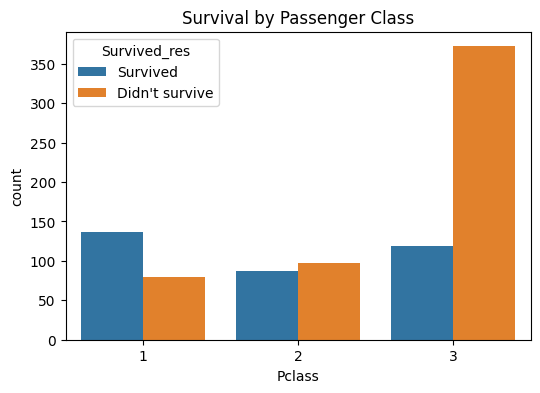

In [ ]:
# Plot Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived_res', data=df)
plt.title("Survival by Passenger Class")

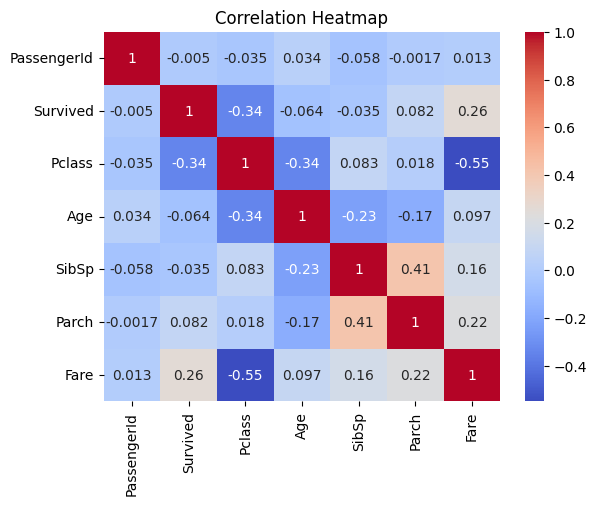

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()